# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import copy
import missingno
from sklearn.model_selection import train_test_split
from fast_ml.model_development import train_valid_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

# Read_Data

In [2]:
data=pd.read_csv(r'creditcard.csv')
df=copy.deepcopy(data)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.0,0,33.6,0.627,50,1
1,1,85,66,29.0,0,26.6,0.351,31,0
2,8,183,64,0.0,0,23.3,0.672,32,1
3,1,89,66,23.0,94,28.1,0.167,21,0
4,0,137,40,35.0,168,43.1,2.288,33,1


# Check and drop Duplicated

In [3]:
df.duplicated().sum()

4

In [4]:
df[df.duplicated()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
768,1,126,60,0.0,0,30.1,0.349,47,1
769,1,93,70,31.0,0,30.4,0.315,23,0
770,1,126,60,0.0,0,30.1,0.349,47,1
771,1,93,70,31.0,0,30.4,0.315,23,0


In [5]:
df = df.drop_duplicates()
df.duplicated().sum()

0

# Get Information of Data

In [6]:
df.shape

(768, 9)

Describe numerical

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,766.000000,768.000000,761.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.590078,79.799479,32.039028,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.938414,115.244002,7.823225,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Describe object if you have

In [8]:
# df.describe(include=['object'])

In [9]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               2
Insulin                     0
BMI                         7
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<Axes: >

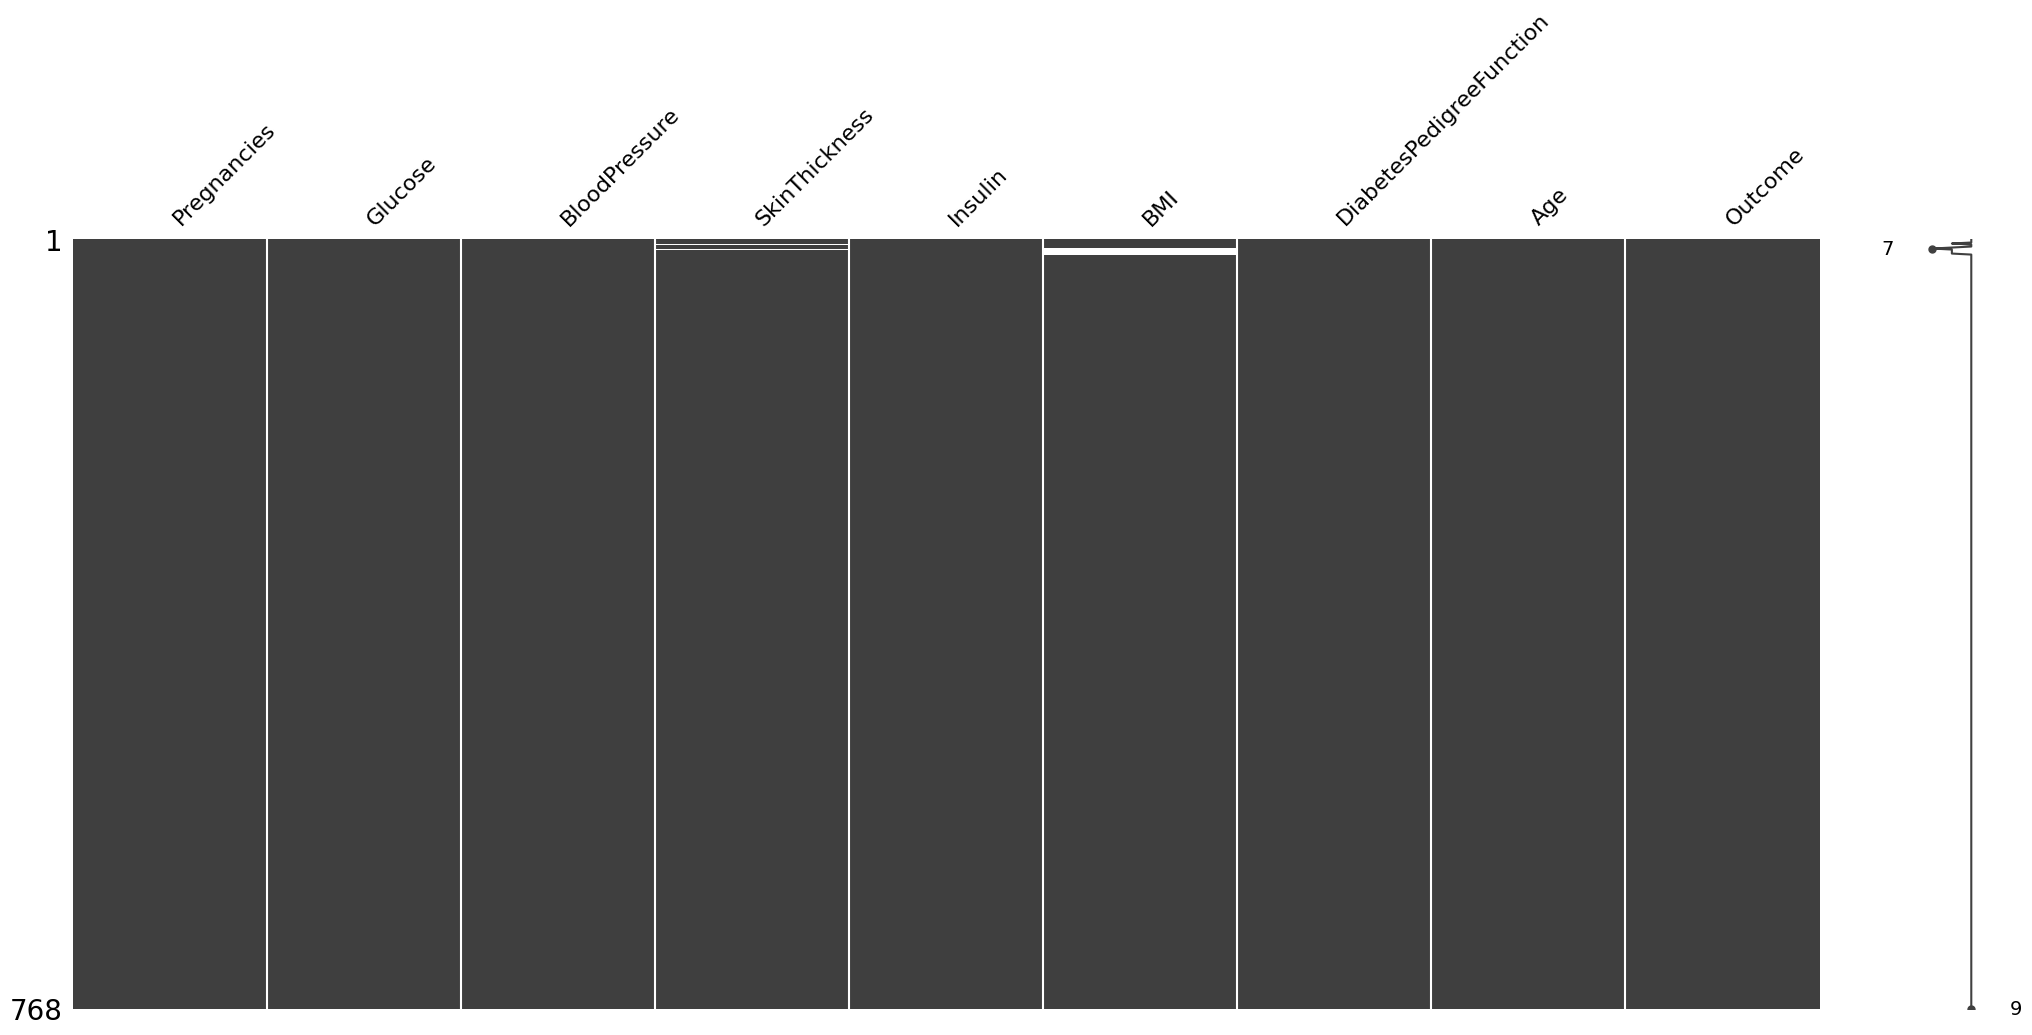

In [10]:
missingno.matrix(df)
# missingno.bar(df)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             766 non-null    float64
 4   Insulin                   768 non-null    int64  
 5   BMI                       761 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 60.0 KB


In [12]:
df.columns.tolist()

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

# Drop columns that aren't useful

In [13]:
# df.drop(['Unnamed: 32','id'],axis=1,inplace=True)
# df.head()

# Removing Rows with Missing Values

In [14]:
# df.dropna(subset=['Glucose','Diastolic_BP'], inplace=True)
# df.isnull().sum()

# Filling Missing Values

## By using model to fill the missing

### KNNImputer

In [15]:
from sklearn.impute import KNNImputer
feature_columns = df.columns
imputer = KNNImputer(n_neighbors=5)
df = imputer.fit_transform(df)
df = pd.DataFrame(df , columns=feature_columns)

### SimpleImputer

In [16]:
# from sklearn.impute import SimpleImputer
# feature_columns = df.columns
# imputer = SimpleImputer()
# df = imputer.fit_transform(df)
# df = pd.DataFrame(df , columns=feature_columns)

## Filling Missing Values for all DataFrame

In [17]:
# # Fill with a constant value
# df = df.fillna(0)

# # Fill with the mean value
# df = df.fillna(df.mean())

# # Fill with the median value
# df = df.fillna(df.median())

# # Fill with the most frequent value (mode)
# df = df.apply(lambda x: x.fillna(x.mode()[0]), axis=0)

# # Interpolation (linear)
# df = df.interpolate()

## Identify columns with missing values

In [18]:
# Identify columns with missing values
missing_columns = df.columns[df.isnull().any()].tolist()
print("Columns with missing values: \n" , missing_columns)

Columns with missing values: 
 []


## Filling Missing Values for each column

## By mean, median and mode

In [19]:
# # Fill with a constant value
# df[['Serum_Insulin']] = df[['Serum_Insulin']].fillna(0)

# # Fill with the mean value
# df[['Marketing Spend']] = df[['Marketing Spend']].fillna(df[['Marketing Spend']].mean())

# # Fill with the median value
# df[['Serum_Insulin']] = df[['Serum_Insulin']].fillna(df[['Marketing Spend']].median())

# # Fill with the most frequent value (mode)
# df[['Marketing Spend']] = df[['Marketing Spend']].apply(lambda x: x.fillna(x.mode()[0]), axis=0)

# # Interpolation (linear)
# df[['Marketing Spend']] = df[['Marketing Spend']].interpolate()

# df.head()

## Check the Missing Values

In [20]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Check balance for Output (Classification_train)

In [21]:
y_out = 'Outcome'
df[y_out].value_counts()

Outcome
0.0    500
1.0    268
Name: count, dtype: int64

In [22]:
y_out = 'Outcome'
# engine-location as variable
engine_loc_counts = df[y_out].value_counts().to_frame()
engine_loc_counts.rename(columns={y_out: 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'name'
engine_loc_counts.head(10)

,count
name,
0.0,500
1.0,268


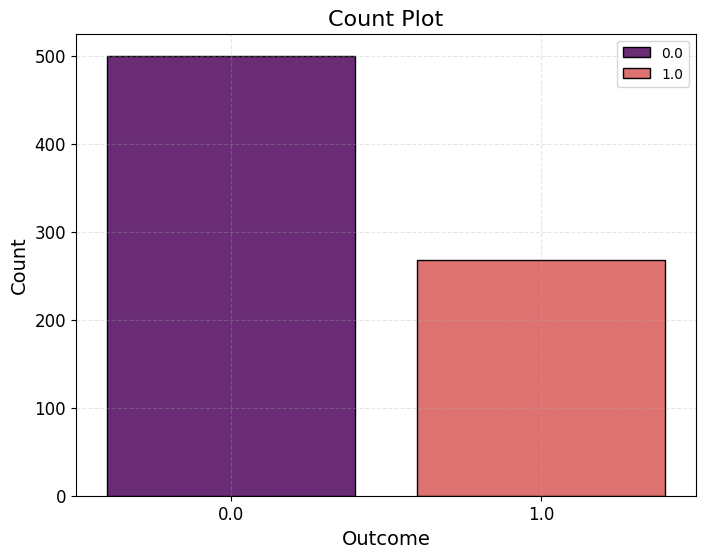

In [23]:
# Seaborn count plot with customizations
plt.figure(figsize=(8, 6))  # Set the figure size
sns.countplot(data=df, x=y_out, hue=y_out, palette='magma', order=df[y_out].value_counts().index, edgecolor='black', legend=False)
plt.xlabel(y_out, fontsize=14)  # Set x-axis label with font size
plt.ylabel('Count', fontsize=14)  # Set y-axis label with font size
plt.title('Count Plot', fontsize=16)  # Set title with font size
plt.grid(True, linestyle='--', linewidth=0.8, alpha=0.3)  # Add grid lines with custom style
plt.xticks(fontsize=12)  # Set font size for x-axis ticks
plt.yticks(fontsize=12)  # Set font size for y-axis ticks
plt.legend(set(df[y_out]), loc='upper right')  # Add legend
plt.show()

# Correlation Coefficient

In [24]:
# y_out = 'Outcome'
# numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns.to_list()
# for param in numeric_columns:
#     pearson_coef, p_value = stats.pearsonr(df[param], df[y_out])
#     print(param)
#     print("The Pearson Correlation Coefficient for ",param," is", pearson_coef, " with a P-value of P =", p_value,'\n')

# Groupby and pivot

In [25]:
# df_group = df[['','','']]

# # grouping results
# df_group_one = df_group.groupby(['',''],as_index=False).mean()
# df_group_one

In [26]:
# grouped_pivot = df_group_one.pivot(index='',columns='')
# grouped_pivot

In [27]:
# # pcolor
# fig, ax = plt.subplots()
# im = ax.pcolor(grouped_pivot, cmap='RdBu')

# #label names
# row_labels = grouped_pivot.columns.levels[1]
# col_labels = grouped_pivot.index

# #move ticks and labels to the center
# ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
# ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

# #insert labels
# ax.set_xticklabels(row_labels, minor=False)
# ax.set_yticklabels(col_labels, minor=False)

# fig.colorbar(im)

# Visualization

## Heatmap

In [73]:
# without str column in dataset
# correlations=df.corr()
# drop str column to get correlations
numeric_columns = df.select_dtypes(include=['int64', 'float64'])
correlations=numeric_columns.corr()
correlations

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081271,-0.073535,0.025817,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.056886,0.331357,0.230529,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.209280,0.088933,0.298733,0.041265,0.239528,0.065068
SkinThickness,-0.081271,0.056886,0.209280,1.000000,0.435935,0.388771,0.182250,-0.114870,0.073101
Insulin,-0.073535,0.331357,0.088933,0.435935,1.000000,0.205486,0.185071,-0.042163,0.130548
BMI,0.025817,0.230529,0.298733,0.388771,0.205486,1.000000,0.140185,0.054641,0.305480
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.182250,0.185071,0.140185,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.114870,-0.042163,0.054641,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.073101,0.130548,0.305480,0.173844,0.238356,1.000000


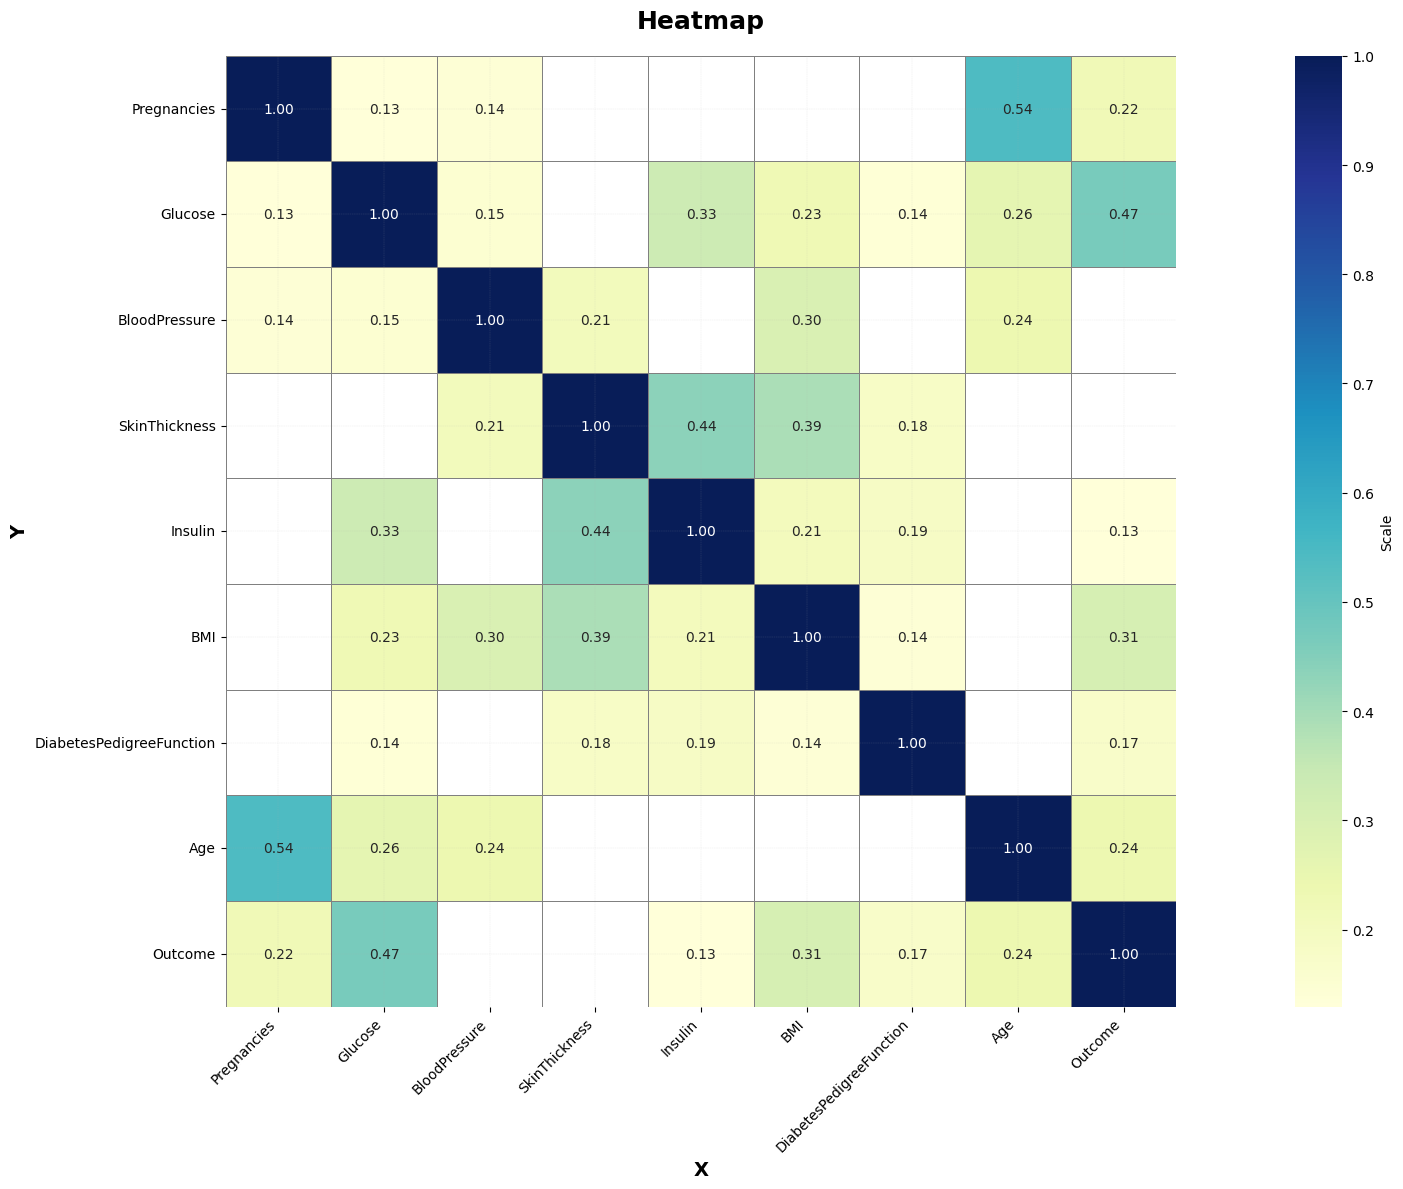

In [29]:
# Create a figure and axis
plt.figure(figsize=(24, 12))

# Create a heatmap with customization
heatmap = sns.heatmap(
    data=correlations,
    annot=True,              # Annotate cells with the data value
    fmt=".2f",               # Format the annotations to 2 decimal places
    cmap="YlGnBu",           # Colormap
    cbar=True,               # Show color bar
    cbar_kws={'label': 'Scale'},  # Color bar customization
    linewidths=0.5,          # Line width between cells
    linecolor='gray',        # Line color between cells
    square=True,             # Force square cells
    mask=correlations<0.1,               # Do not mask any data
    annot_kws={"size": 10},  # Annotation font size
    xticklabels=True,        # Show x-axis labels
    yticklabels=True,        # Show y-axis labels
    robust=True              # Robust colormap limits
)

# Customize the plot
plt.title('Heatmap', fontsize=18, weight='bold', pad=20)
plt.xlabel('X', fontsize=14, weight='bold')
plt.ylabel('Y', fontsize=14, weight='bold')

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

# Rotate y-axis labels
plt.yticks(rotation=0)

# Adjust layout for better fit
plt.tight_layout()
plt.grid(True, linestyle='--', linewidth=0.3, alpha=0.3)
# Display the heatmap
plt.show()

## Scatter plot

In [30]:
# df.columns.tolist()

In [31]:
# # Create Seaborn scatter plot with customization
# plt.figure(figsize=(10, 6))
# scatter = sns.scatterplot(
#                         data=df, 
#                         x='R&D Spend', 
#                         y='Profit',
#                         hue = 'Profit',
#                         palette='viridis', 
#                         sizes=(20, 500), 
#                         alpha=0.7, 
#                         edgecolor='w', 
#                         linewidth=1.5
# )
# # Customize plot
# plt.title('Scatter Plot')
# plt.xlabel('YearsExperience')
# plt.ylabel('Salary')
# plt.grid(True, linewidth=0.3, alpha=0.3)
# # Add legend

# # Display plot
# plt.show()

## Histogram

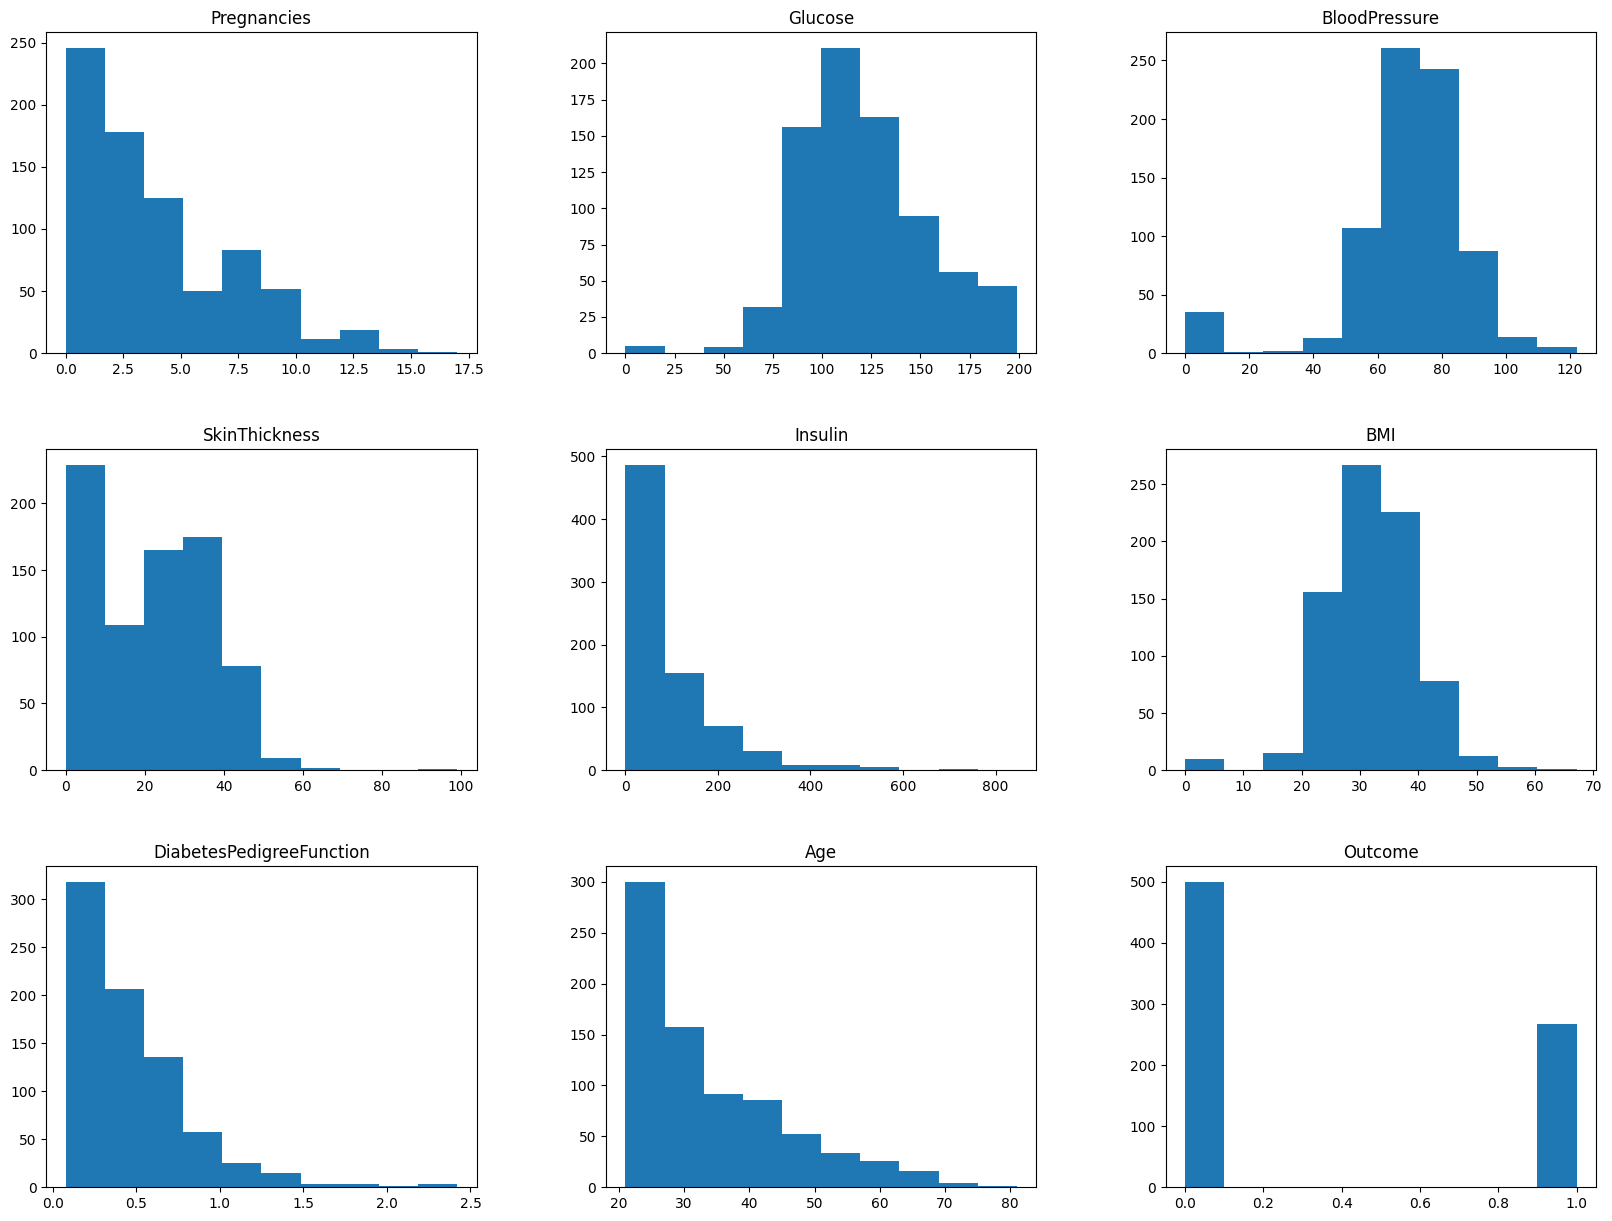

In [32]:
df.hist(figsize=(20,15),grid=False,)
plt.show()

# # or
fig, axes = plt.subplots(nrows = 2, ncols =2, figsize = (8, 6))
colors = ["#e24a33", "#348abd", "#988ed5", "#777777"] # whatever the colors may be but it should be different for each histogram.
for index, column in enumerate(correlations.columns):
    ax = axes.flatten()[index]
    ax.hist(df[column], color = colors[index], label = column)
    ax.legend(loc = "best")
plt.suptitle("Desired Histograms", size = 20)
plt.show()

## show DataFrame

In [33]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0


# Data Encoding

## If it have more than two different words

### get_dummies

In [34]:
# dummies = []
# cols = ['diagnosis']
# for col in cols:
#     dummies.append(pd.get_dummies(df[col], drop_first=True, dtype=float))
# titanic_dummies = pd.concat(dummies, axis=1)
# df = pd.concat((df, titanic_dummies), axis=1)
# df.head()

In [35]:
# df=df.drop(cols,axis=1)
# df.head()

### *------------------------------------------------------------------------------------------------------------------*

### LabelEncoder

In [36]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# df['State'] = le.fit_transform(df['State'])
# df.head()

### If only have two different words.

In [37]:
# df['diagnosis'].unique()

In [38]:
# df['diagnosis']=[ 1 if i=='M'  else 0  for i in df['diagnosis']]

In [39]:
# df['diagnosis'].unique()

In [40]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   Outcome                   768 non-null    float64
dtypes: float64(9)
memory usage: 54.1 KB


# Get X , Y

In [42]:
# x=df.drop('diagnosis',axis=1)
# y=df['diagnosis']

### or

In [43]:
# x=df.iloc[:,:-1]
# y=df.iloc[:,-1]

## Get train and test data

In [44]:
# from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.3, random_state=42)

In [45]:
# print('x_train shape =',x_train.shape)
# print('x_test shape =',x_test.shape)
# print('y_train shape =',y_train.shape)
# print('y_test shape =',y_test.shape)

## Get validation data

In [46]:
# from sklearn.model_selection import train_test_split
# x_train, x_valid, y_train, y_valid=train_test_split(x_train,y_train,test_size=.3, random_state=42)

In [47]:
# print('x_train shape =',x_train.shape)
# print('x_valid shape =',x_valid.shape)
# print('y_train shape =',y_train.shape)
# print('y_valid shape =',y_valid.shape)

# Get train, valid and test data in same time

In [48]:
df.columns.tolist()

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [49]:
from fast_ml.model_development import train_valid_test_split
x_train , y_train ,x_valid , y_valid , x_test , y_test = train_valid_test_split(df , target='Outcome',train_size=0.7,valid_size=0.1,test_size=0.2,random_state=42)

In [50]:
print('x_train shape =',x_train.shape)
print('x_valid shape =',x_valid.shape)
print('x_test shape =',x_test.shape)
print('y_train shape =',y_train.shape)
print('y_valid shape =',y_valid.shape)
print('y_test shape =',y_test.shape)

x_train shape = (537, 8)
x_valid shape = (77, 8)
x_test shape = (154, 8)
y_train shape = (537,)
y_valid shape = (77,)
y_test shape = (154,)


# Scaling

In [51]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_valid=scaler.transform(x_valid)
x_test=scaler.transform(x_test)

# Train

## Grid Search

In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

decision_tree = DecisionTreeClassifier()
params = {
    'criterion':['gini', 'entropy'],
    'max_depth':[3,4,5,6,7,8,9,10]
}
grid_search = GridSearchCV(decision_tree, params, scoring='recall', cv=5)

# Train the grid search
grid_search.fit(x_train, y_train)  

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='recall')

In [53]:
print("Best Hyperparameter Index:", grid_search.best_index_)
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validated Score:", grid_search.best_score_)

Best Hyperparameter Index: 9
Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 4}
Best Cross-Validated Score: 0.7608819345661451


In [54]:
# Get the model with best hyperparameters
model = grid_search.best_estimator_
y_pred = model.predict(x_test)

## Randomized Search

In [55]:
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.model_selection import RandomizedSearchCV

# decision_tree = DecisionTreeClassifier()
# params = {
#     'criterion':['gini', 'entropy'],
#     'max_depth':[3,4,5,6,7,8,9,10]
# }

# random_search = RandomizedSearchCV(decision_tree, params, scoring='r2', cv=5, random_state=42)

# # Train the random search
# random_search.fit(x_train, y_train)

In [56]:
# print("Best Hyperparameter Index:", random_search.best_index_)
# print("Best Hyperparameters:", random_search.best_params_)
# print("Best Cross-Validated Score:", random_search.best_score_)

In [57]:
# model = random_search.best_estimator_
# y_pred = model.predict(x_test)

## Train Support_vector_machine(SVC) without search

In [58]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(criterion='entropy', max_depth=4)
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

# Plot the Decision Tree

<function matplotlib.pyplot.show(close=None, block=None)>

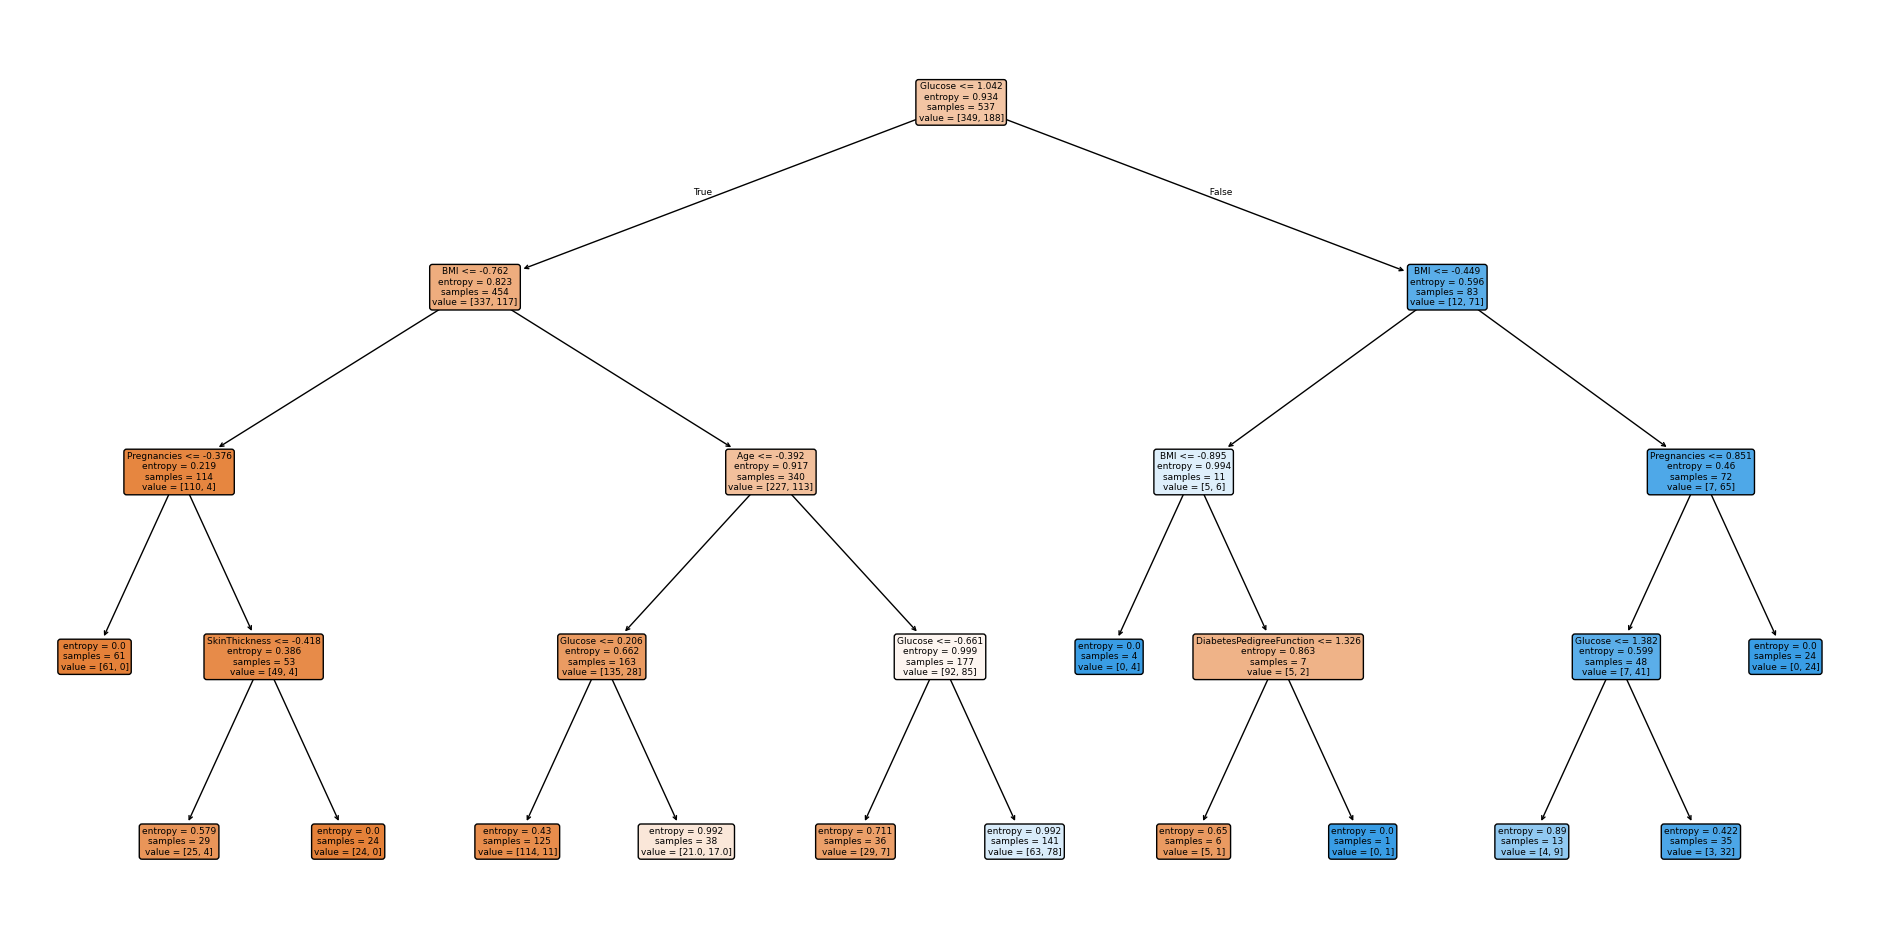

In [59]:
from sklearn import tree
from sklearn.tree import plot_tree

plt.figure(figsize=(24, 12))
feature_name = df.columns[:8]

tree.plot_tree(
    model,
    feature_names=feature_name,
    filled=True,
    rounded=True)
plt.show

# Check Overfitting

In [60]:
y_train_pred=model.predict(x_train)
accuracy_score(y_train_pred , y_train)


0.7951582867783985

In [61]:
y_valid_pred=model.predict(x_valid)
accuracy_score(y_valid_pred , y_valid)

0.7792207792207793

# Evaluate model

In [62]:
y_pred = model.predict(x_test)

### confusion_matrix

In [63]:
from sklearn.metrics import confusion_matrix
confusion=confusion_matrix(y_test , y_pred)
confusion

array([[70, 29],
       [17, 38]], dtype=int64)

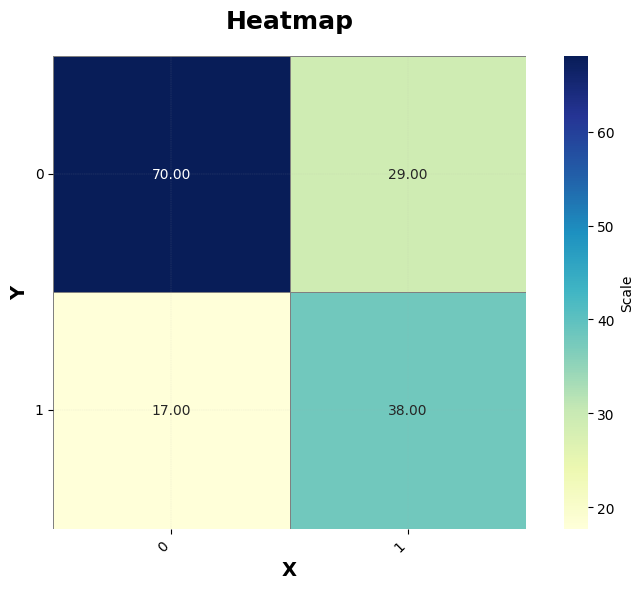

In [64]:
# Create a figure and axis
plt.figure(figsize=(8, 6))

# Create a heatmap with customization
heatmap = sns.heatmap(
    data=confusion,
    annot=True,              # Annotate cells with the data value
    fmt=".2f",               # Format the annotations to 2 decimal places
    cmap="YlGnBu",           # Colormap
    cbar=True,               # Show color bar
    cbar_kws={'label': 'Scale'},  # Color bar customization
    linewidths=0.5,          # Line width between cells
    linecolor='gray',        # Line color between cells
    square=True,             # Force square cells
    mask=confusion<1,               # Do not mask any data
    annot_kws={"size": 10},  # Annotation font size
    xticklabels=True,        # Show x-axis labels
    yticklabels=True,        # Show y-axis labels
    robust=True              # Robust colormap limits
)

# Customize the plot
plt.title('Heatmap', fontsize=18, weight='bold', pad=20)
plt.xlabel('X', fontsize=14, weight='bold')
plt.ylabel('Y', fontsize=14, weight='bold')

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

# Rotate y-axis labels
plt.yticks(rotation=0)

# Adjust layout for better fit
plt.tight_layout()
plt.grid(True, linestyle='--', linewidth=0.3, alpha=0.3)
# Display the heatmap
plt.show()

### accuracy_score

In [65]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test , y_pred)

0.7012987012987013

### recall_score

In [66]:
from sklearn.metrics import recall_score
recall_score(y_test , y_pred)

0.6909090909090909

### precision_score

In [67]:
from sklearn.metrics import precision_score
precision_score(y_test , y_pred)

0.5671641791044776

### f1_score

In [68]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred)

0.6229508196721312

### roc_curve

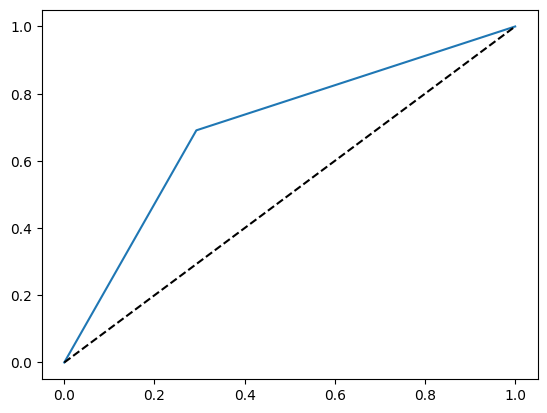

In [69]:
from sklearn.metrics import roc_curve
FPR,TPR,THE=roc_curve(y_test, y_pred)
plt.plot(FPR,TPR)
plt.plot([0,1],[0,1],'k--')

### roc_auc_score

In [70]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred)

0.698989898989899